In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import pickle

pd.set_option('display.max_rows',10000)
pd.set_option('display.min_rows',2000)
pd.set_option('display.column_space',30)
pd.set_option('display.max_colwidth',150)
pd.set_option('display.expand_frame_repr',True)

_end_dates    = pd.Series(pd.date_range(start="2020-10-08", end="2021-03-31", freq="D", tz='America/New_York'))
_start_dates  = _end_dates - pd.Timedelta(days=7)
_center_dates = _end_dates - pd.Timedelta(days=3.5)
end_dates     = _end_dates.apply(lambda x: x.timestamp())
center_dates  = _center_dates.apply(lambda x: x.timestamp())
start_dates   = _start_dates.apply(lambda x: x.timestamp())
_end_dates    = _end_dates.apply(lambda x:str(x).split(' ')[0])
_center_dates = _center_dates.apply(lambda x:str(x).split(' ')[0])
_start_dates  = _start_dates.apply(lambda x:str(x).split(' ')[0])

id_l = '/home/casonk/path/mmani_root/mmani0/shared_data/hot/push_file/IDL/'

j=1
k=21
r=5

In [ ]:
neoliberal_tl = []
neoliberal_ei = []
neoliberal_dt = []
neoliberal_recip = []
neoliberal_aspl = []
neoliberal_trans = []
neoliberal_acc = []
neoliberal_dia = []
neoliberal_rad = []
n=2
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(300)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['neoliberal']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        neoliberal_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        neoliberal_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        neoliberal_dt += [date]

        with open((id_l + date + ('/LC_{}_{}_{}.pkl').format(j, k, r)), 'rb') as fh:
            lc = pickle.load(fh)
        tdf = pd.read_pickle((id_l + date + ('/TRIMMED_DF_{}_{}.pkl').format(j, k)))
        edges = tdf[tdf['Source'].isin(lc[incom]) & tdf['Target'].isin(lc[incom])]
        G = nx.DiGraph()
        for info in edges.values:
            G.add_edge(info[0], info[1], subreddit=info[2], weight=int(info[3]))
        with open((id_l + date + ('/G_{}_{}_{}_{}.pkl').format(incom, j, k, r)), 'wb') as fh:
            pickle.dump(G, fh)
        neoliberal_recip += [nx.overall_reciprocity(G)]
        # neoliberal_aspl += [nx.average_shortest_path_length(G)]
        neoliberal_trans += [nx.transitivity(G)]
        neoliberal_acc += [nx.average_clustering(G)]
        # neoliberal_dia += [nx.diameter(G)]
        # neoliberal_rad += [nx.radius(G)]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

ukpolitics_tl = []
ukpolitics_ei = []
ukpolitics_dt = []
ukpolitics_recip = []
ukpolitics_aspl = []
ukpolitics_trans = []
ukpolitics_acc = []
ukpolitics_dia = []
ukpolitics_rad = []
n=3
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['ukpolitics']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        ukpolitics_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        ukpolitics_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        ukpolitics_dt += [date]

        with open((id_l + date + ('/LC_{}_{}_{}.pkl').format(j, k, r)), 'rb') as fh:
            lc = pickle.load(fh)
        tdf = pd.read_pickle((id_l + date + ('/TRIMMED_DF_{}_{}.pkl').format(j, k)))
        edges = tdf[tdf['Source'].isin(lc[incom]) & tdf['Target'].isin(lc[incom])]
        G = nx.DiGraph()
        for info in edges.values:
            G.add_edge(info[0], info[1], subreddit=info[2], weight=int(info[3]))
        with open((id_l + date + ('/G_{}_{}_{}_{}.pkl').format(incom, j, k, r)), 'wb') as fh:
            pickle.dump(G, fh)
        ukpolitics_recip += [nx.overall_reciprocity(G)]
        # ukpolitics_aspl += [nx.average_shortest_path_length(G)]
        ukpolitics_trans += [nx.transitivity(G)]
        ukpolitics_acc += [nx.average_clustering(G)]
        # ukpolitics_dia += [nx.diameter(G)]
        # ukpolitics_rad += [nx.radius(G)]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

conservative_tl = []
conservative_ei = []
conservative_dt = []
conservative_recip = []
conservative_aspl = []
conservative_trans = []
conservative_acc = []
conservative_dia = []
conservative_rad = []
n=1
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['conservative']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        conservative_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        conservative_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        conservative_dt += [date]

        with open((id_l + date + ('/LC_{}_{}_{}.pkl').format(j, k, r)), 'rb') as fh:
            lc = pickle.load(fh)
        tdf = pd.read_pickle((id_l + date + ('/TRIMMED_DF_{}_{}.pkl').format(j, k)))
        edges = tdf[tdf['Source'].isin(lc[incom]) & tdf['Target'].isin(lc[incom])]
        G = nx.DiGraph()
        for info in edges.values:
            G.add_edge(info[0], info[1], subreddit=info[2], weight=int(info[3]))
        with open((id_l + date + ('/G_{}_{}_{}_{}.pkl').format(incom, j, k, r)), 'wb') as fh:
            pickle.dump(G, fh)
        conservative_recip += [nx.overall_reciprocity(G)]
        # conservative_aspl += [nx.average_shortest_path_length(G)]
        conservative_trans += [nx.transitivity(G)]
        conservative_acc += [nx.average_clustering(G)]
        # conservative_dia += [nx.diameter(G)]
        # conservative_rad += [nx.radius(G)]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

conspiracy_tl = []
conspiracy_ei = []
conspiracy_dt = []
conspiracy_recip = []
conspiracy_aspl = []
conspiracy_trans = []
conspiracy_acc = []
conspiracy_dia = []
conspiracy_rad = []
n=3
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['conspiracy']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        conspiracy_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        conspiracy_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        conspiracy_dt += [date]

        with open((id_l + date + ('/LC_{}_{}_{}.pkl').format(j, k, r)), 'rb') as fh:
            lc = pickle.load(fh)
        tdf = pd.read_pickle((id_l + date + ('/TRIMMED_DF_{}_{}.pkl').format(j, k)))
        edges = tdf[tdf['Source'].isin(lc[incom]) & tdf['Target'].isin(lc[incom])]
        G = nx.DiGraph()
        for info in edges.values:
            G.add_edge(info[0], info[1], subreddit=info[2], weight=int(info[3]))
        with open((id_l + date + ('/G_{}_{}_{}_{}.pkl').format(incom, j, k, r)), 'wb') as fh:
            pickle.dump(G, fh)
        conspiracy_recip += [nx.overall_reciprocity(G)]
        # conspiracy_aspl += [nx.average_shortest_path_length(G)]
        conspiracy_trans += [nx.transitivity(G)]
        conspiracy_acc += [nx.average_clustering(G)]
        # conspiracy_dia += [nx.diameter(G)]
        # conspiracy_rad += [nx.radius(G)]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

politics_tl = []
politics_ei = []
politics_dt = []
politics_recip = []
politics_aspl = []
politics_trans = []
politics_acc = []
politics_dia = []
politics_rad = []
n=1
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_75 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(75)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_75 = comm_sub_pairs.loc[top_75.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_75.index.get_level_values(0)
    subs = top_ns_75.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['politics']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        politics_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        politics_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        politics_dt += [date]

        with open((id_l + date + ('/LC_{}_{}_{}.pkl').format(j, k, r)), 'rb') as fh:
            lc = pickle.load(fh)
        tdf = pd.read_pickle((id_l + date + ('/TRIMMED_DF_{}_{}.pkl').format(j, k)))
        edges = tdf[tdf['Source'].isin(lc[incom]) & tdf['Target'].isin(lc[incom])]
        G = nx.DiGraph()
        for info in edges.values:
            G.add_edge(info[0], info[1], subreddit=info[2], weight=int(info[3]))
        with open((id_l + date + ('/G_{}_{}_{}_{}.pkl').format(incom, j, k, r)), 'wb') as fh:
            pickle.dump(G, fh)
        politics_recip += [nx.overall_reciprocity(G)]
        # politics_aspl += [nx.average_shortest_path_length(G)]
        politics_trans += [nx.transitivity(G)]
        politics_acc += [nx.average_clustering(G)]
        # politics_dia += [nx.diameter(G)]
        # politics_rad += [nx.radius(G)]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

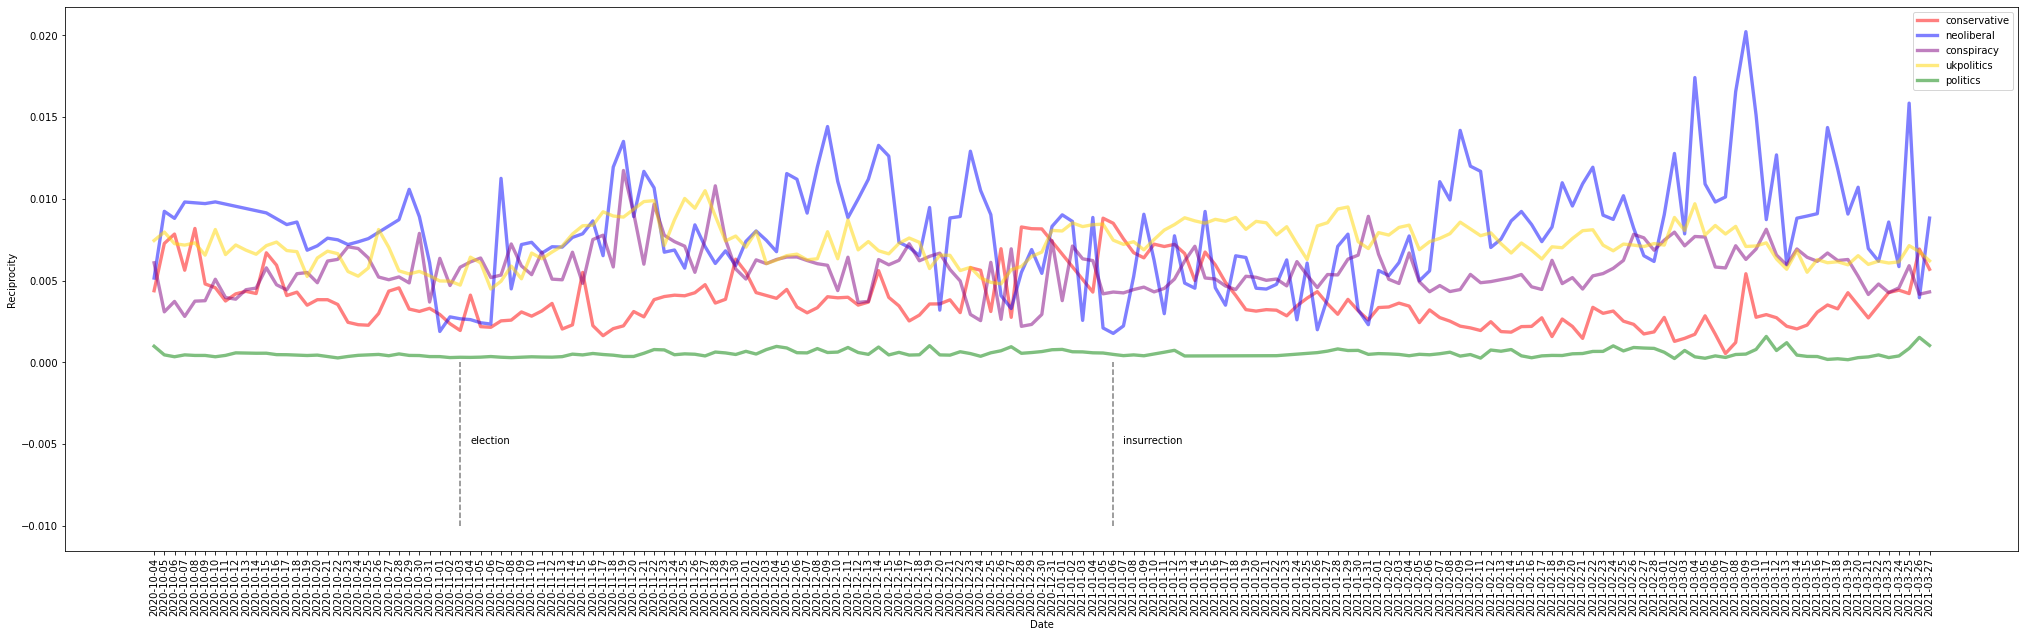

In [17]:
fig = plt.figure(figsize=(35,10))
plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)
plt.plot(conservative_dt, conservative_recip, c='red', lw=3.333, alpha=0.5, label='conservative')
plt.plot(neoliberal_dt, neoliberal_recip, c='blue', lw=3.333, alpha=0.5, label='neoliberal')
plt.plot(conspiracy_dt, conspiracy_recip, c='purple', lw=3.333, alpha=0.5, label='conspiracy')
plt.plot(ukpolitics_dt, ukpolitics_recip, c='gold', lw=3.333, alpha=0.5, label='ukpolitics')
plt.plot(politics_dt, politics_recip, c='green', lw=3.333, alpha=0.5, label='politics')

plt.plot(['2020-11-03','2020-11-03'], [-0.01,-0.0], alpha=0.5, c='black', ls='--')
plt.plot(['2021-01-06','2021-01-06'], [-0.01,-0.0], alpha=0.5, c='black', ls='--')
plt.text('2021-01-07', -0.005, 'insurrection')
plt.text('2020-11-04', -0.005, 'election')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Reciprocity')
plt.legend()

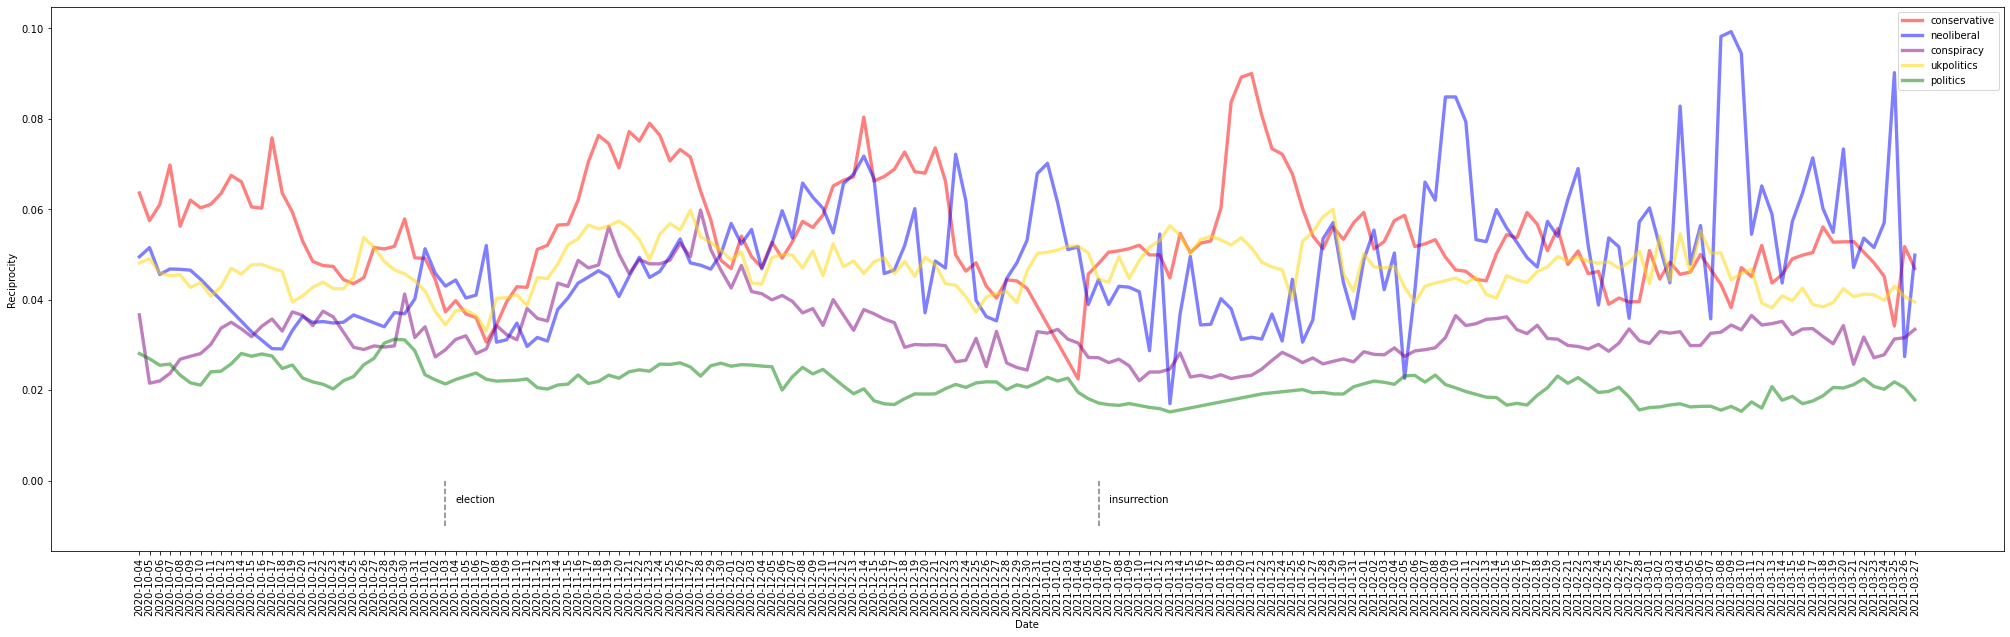

In [8]:
fig = plt.figure(figsize=(35,10))
plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)
plt.plot(conservative_dt, conservative_trans, c='red', lw=3.333, alpha=0.5, label='conservative')
plt.plot(neoliberal_dt, neoliberal_trans, c='blue', lw=3.333, alpha=0.5, label='neoliberal')
plt.plot(conspiracy_dt, conspiracy_trans, c='purple', lw=3.333, alpha=0.5, label='conspiracy')
plt.plot(ukpolitics_dt, ukpolitics_trans, c='gold', lw=3.333, alpha=0.5, label='ukpolitics')
plt.plot(politics_dt, politics_trans, c='green', lw=3.333, alpha=0.5, label='politics')

plt.plot(['2020-11-03','2020-11-03'], [-0.01,-0.0], alpha=0.5, c='black', ls='--')
plt.plot(['2021-01-06','2021-01-06'], [-0.01,-0.0], alpha=0.5, c='black', ls='--')
plt.text('2021-01-07', -0.005, 'insurrection')
plt.text('2020-11-04', -0.005, 'election')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Reciprocity')
plt.legend()

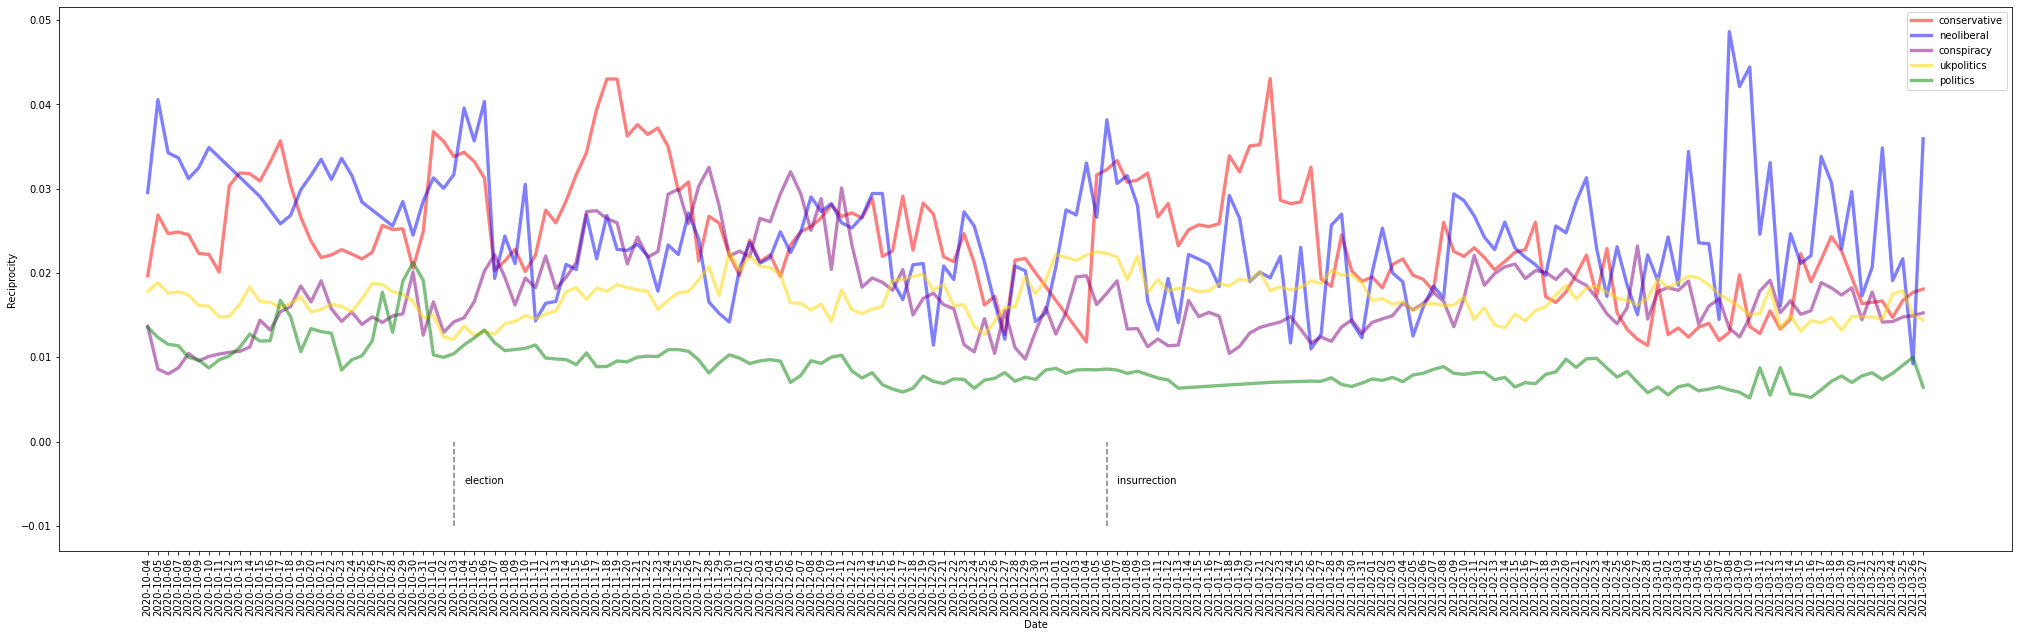

In [9]:
fig = plt.figure(figsize=(35,10))
plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)
plt.plot(conservative_dt, conservative_acc, c='red', lw=3.333, alpha=0.5, label='conservative')
plt.plot(neoliberal_dt, neoliberal_acc, c='blue', lw=3.333, alpha=0.5, label='neoliberal')
plt.plot(conspiracy_dt, conspiracy_acc, c='purple', lw=3.333, alpha=0.5, label='conspiracy')
plt.plot(ukpolitics_dt, ukpolitics_acc, c='gold', lw=3.333, alpha=0.5, label='ukpolitics')
plt.plot(politics_dt, politics_acc, c='green', lw=3.333, alpha=0.5, label='politics')

plt.plot(['2020-11-03','2020-11-03'], [-0.01,-0.0], alpha=0.5, c='black', ls='--')
plt.plot(['2021-01-06','2021-01-06'], [-0.01,-0.0], alpha=0.5, c='black', ls='--')
plt.text('2021-01-07', -0.005, 'insurrection')
plt.text('2020-11-04', -0.005, 'election')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Reciprocity')
plt.legend()

In [11]:
fig = plt.figure(figsize=(35,10))
plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)
plt.plot(conservative_dt, conservative_tl, c='red', lw=3.333, alpha=0.5, label='conservative')
plt.plot(neoliberal_dt, neoliberal_tl, c='blue', lw=3.333, alpha=0.5, label='neoliberal')
plt.plot(conspiracy_dt, conspiracy_tl, c='purple', lw=3.333, alpha=0.5, label='conspiracy')
plt.plot(ukpolitics_dt, ukpolitics_tl, c='gold', lw=3.333, alpha=0.5, label='ukpolitics')
plt.plot(politics_dt, politics_tl, c='green', lw=3.333, alpha=0.5, label='politics')

plt.plot(['2020-11-03','2020-11-03'], [-0.01,-0.0], alpha=0.5, c='black', ls='--')
plt.plot(['2021-01-06','2021-01-06'], [-0.01,-0.0], alpha=0.5, c='black', ls='--')
plt.text('2021-01-07', -0.005, 'insurrection')
plt.text('2020-11-04', -0.005, 'election')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Reciprocity')
plt.legend()